In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

#Data Cleanup
df = pd.read_csv(r"SuperStoreOrders.csv")
df['order_date'] = pd.to_datetime(df['order_date'],format='mixed')
df['ship_date'] = pd.to_datetime(df['ship_date'],format='mixed')
df['sales']=df['sales'].str.replace(',','').astype('int64')
# operating on the assumption that the sales and profit column are in dollars

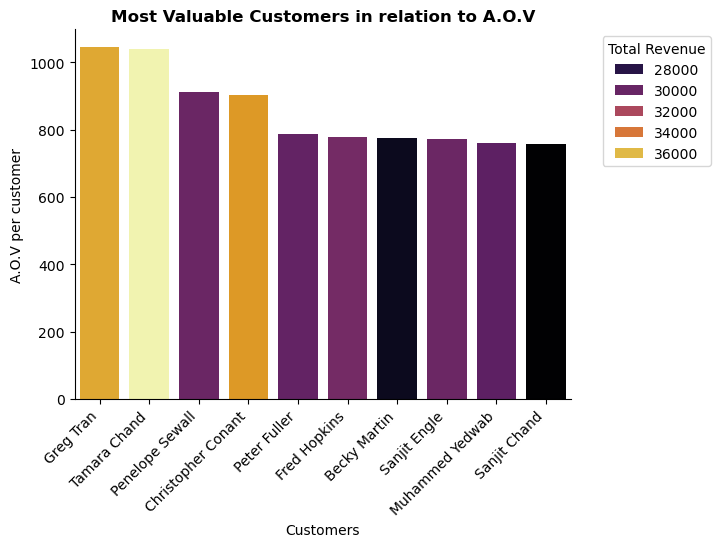

In [2]:
#marketing campaigns to target to valuable customers
customer_stats = df.groupby('customer_name').agg(total_revenue=('sales', 'sum'),number_of_orders=('order_id', 'nunique'))
customer_stats['AOV_per_Customer']= customer_stats['total_revenue']/customer_stats['number_of_orders']
customer_AOV=customer_stats.reset_index().sort_values(by='AOV_per_Customer',ascending=False)
avg_orders=customer_AOV['number_of_orders'].sum()/customer_AOV['customer_name'].count()
avg_orders
customer_AOV=customer_AOV[customer_AOV['number_of_orders']>32].head(10)
sns.barplot(data=customer_AOV,x='customer_name',y='AOV_per_Customer',hue='total_revenue',palette='inferno')
sns.despine()
plt.title('Most Valuable Customers in relation to A.O.V',fontweight='bold')
plt.xlabel('Customers')
plt.ylabel('A.O.V per customer')
plt.legend(loc='best',title='Total Revenue',bbox_to_anchor=(1.05,1))
plt.xticks(rotation=45,ha='right')
plt.show()

C:\Users\Jesse\AppData\Local\Temp\ipykernel_23940\3815272084.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_category=df_category.groupby('market_').apply(lambda x:x.sort_values('sum_sales',ascending=False)).reset_index(drop=True)
C:\Users\Jesse\AppData\Local\Temp\ipykernel_23940\3815272084.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')
C:\Users\Jesse\AppData\Local\Temp\ipykernel_23940\3815272084.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  

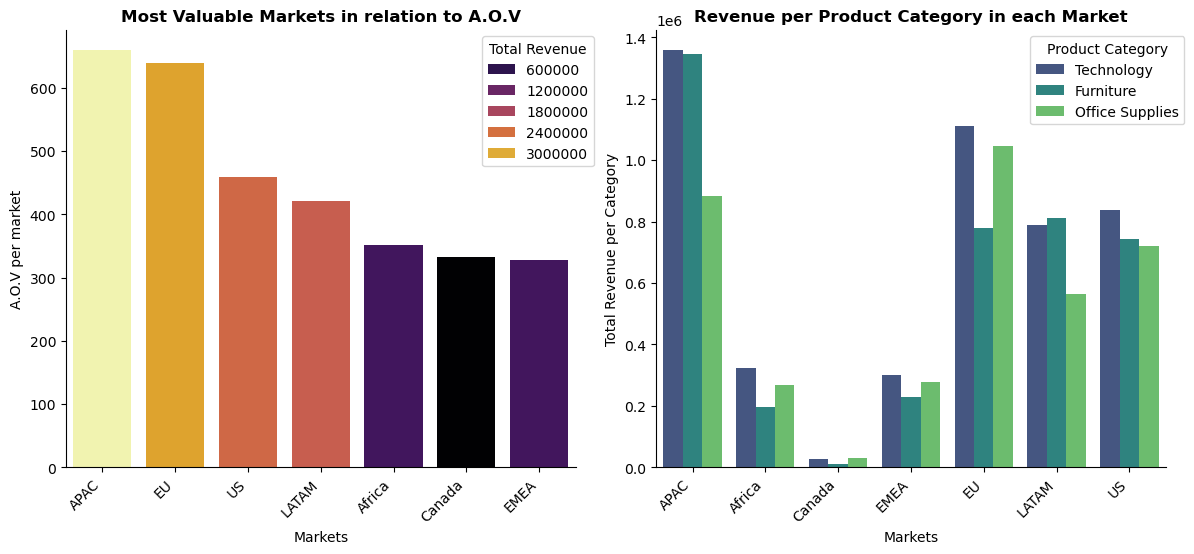

In [3]:
# Comparing the average order value for each market with the total revenue generated from the three product categories in each of those markets

fig, ax=plt.subplots(1,2,figsize=(12,5.8))

market_stats = df.groupby('market').agg(total_revenue=('sales', 'sum'),number_of_orders=('order_id', 'nunique'))
market_stats['AOV_per_market']= market_stats['total_revenue']/market_stats['number_of_orders']
market_AOV=market_stats.reset_index().sort_values(by='AOV_per_market',ascending=False)
market_AOV

df_category=df.pivot_table(values='sales',index=['market','category'],aggfunc=['sum','count']).reset_index()
df_category.columns= ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df_category.columns]#flatten the columns to have only one
df_category=df_category.groupby('market_').apply(lambda x:x.sort_values('sum_sales',ascending=False)).reset_index(drop=True)


sns.barplot(data=market_AOV,x='market',y='AOV_per_market',ax=ax[0],hue='total_revenue',palette='inferno')
sns.despine()
ax[0].set_title('Most Valuable Markets in relation to A.O.V',fontweight='bold')
ax[0].set_xlabel('Markets')
ax[0].set_ylabel('A.O.V per market')
ax[0].legend(loc='best',title='Total Revenue',bbox_to_anchor=(1.05,1))
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45,ha='right')

sns.barplot(data=df_category,x='market_',y='sum_sales',ax=ax[1],hue='category_',palette='viridis')
sns.despine()
ax[1].set_title('Revenue per Product Category in each Market',fontweight='bold')
ax[1].set_xlabel('Markets')
ax[1].set_ylabel('Total Revenue per Category')
ax[1].legend(loc='best',title='Product Category',bbox_to_anchor=(1.05,1))
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45,ha='right')

fig.tight_layout()
plt.show()